* PCA is for linear dimensional reduction
* t-SNE is for non-linear dimension reduction. t-SNE is famous for visualization for 2D projection (project higher dimensional data into 2D). But it won't help you tell feature importance.
  * For t-SNE visualization, just check my code: https://github.com/hanhanwu/Hanhan_Data_Science_Practice/blob/master/Outliers_and_Clustering/dimensional_reduction_visualization.ipynb

I'm trying to see how to make their output or plot make sense.

References
* PCA - http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
  * code: https://github.com/jotterbach/Data-Exploration-and-Numerical-Experimentation/blob/master/Data-Analytics/PCA_Pitfalls.ipynb

In [20]:
import sklearn.datasets as ds
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline

In [9]:
data = ds.load_breast_cancer()['data']
data.shape  # 30 features

(569, 30)

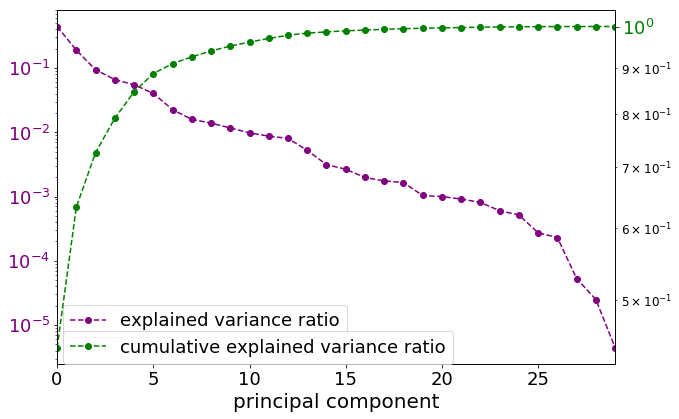

In [18]:
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)
pca_trafo = PCA().fit(z_data);

fig, ax1 = plt.subplots(figsize = (10,6.5))
ax1.semilogy(pca_trafo.explained_variance_ratio_, '--o', label = 'explained variance ratio', color='purple');
ax1.set_xlabel('principal component', fontsize = 20);
for tl in ax1.get_yticklabels():
    tl.set_color('purple')
    
plt.legend(loc=(0.01, 0.075) ,fontsize = 18);

ax2 = ax1.twinx()
ax2.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--go', label = 'cumulative explained variance ratio');
for tl in ax2.get_yticklabels():
    tl.set_color('g')

ax1.tick_params(axis='both', which='major', labelsize=18);
ax1.tick_params(axis='both', which='minor', labelsize=12);
ax2.tick_params(axis='both', which='major', labelsize=18);
ax2.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29]);
plt.legend(loc=(0.01, 0),fontsize = 18);

From the above visualization, I personaly recommend just to check cumulative explained variance ratio plot with the marks on the right side. When principle component=6, we have 0.9 (90%), it means 6 principle components can explain 90% of the full variance.
Then we can choose the features below based on their contribution.

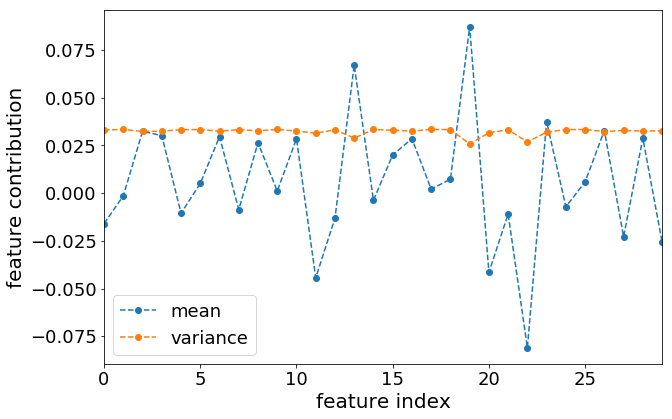

In [23]:
n_comp =30
pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)

The above visualization shows the mean and variance of each feature contribution aggregated over all principal components. We can <b>keep features with large absolute mean</b> and see how those perform in a modeling task.

# NOTES: 
## principle components != original features
## overall variance is for principle coponents

1. From the above cumulative explained variance ratio curve, we could tell 6 principle components are able to explain 90% variance. But these are 6 principle components, no longer the orginal features. So take care, when you think there are 6 features could explain 90% variance. There can be difference. And for dimensional reduction, finally what you use is these 6 principle components, not original features.

2. For feature selection, you can use the above absolute mean method with `pca_inv_data` to inverse back to the original features. For those features that have higher absolute mean, they tend to contribute more to the overall principle component variance.